# Decision Tree Classification

## Objective:  
To learn to analyze the data, build, visualize, and evaluate decision trees using available learning dataset.

**Note:**  I will be using the learning data from IBM lab for this model.

In [1]:
import sys
print(sys.version)

3.13.7 | packaged by Anaconda, Inc. | (main, Sep  9 2025, 19:54:37) [MSC v.1929 64 bit (AMD64)]


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [4]:
url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(url)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Data Analysis and pre-processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


There are 4 categorical features in this dataset.  These features need to be encoded.

In [6]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
label_mapping = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
df['Drug_num'] = df['Drug'].map(label_mapping)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


In [9]:
df.drop(['Drug'], axis=1).corr()['Drug_num']

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.589120
Drug_num       1.000000
Name: Drug_num, dtype: float64

## Modeling

In [10]:
Y = df['Drug']
X = df.drop(['Drug','Drug_num'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=32)

decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

In [11]:
decisionTree.fit(X_train, Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
predictions = decisionTree.predict(X_test)

In [13]:
Prediction_accuracy = metrics.accuracy_score(Y_test, predictions)
print(f"Decision Tree's Accuracy:  {Prediction_accuracy:.2f}")

Decision Tree's Accuracy:  0.82


## Visualization

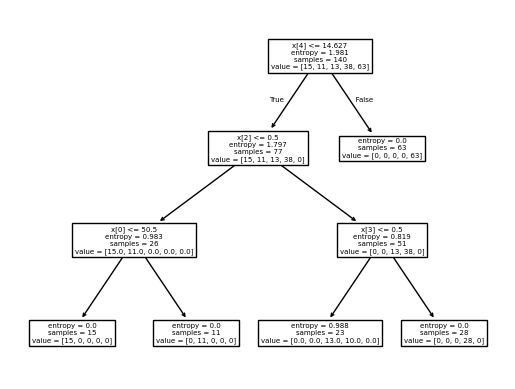

In [14]:
plot_tree(decisionTree)
plt.show()

# Evaluation

Compare the accuracy on different tree depth (max_depth = 4 in this case)

In [16]:
decisionTree1 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree1.fit(X_train, Y_train)
predictions1 = decisionTree1.predict(X_test)
Prediction_accuracy = metrics.accuracy_score(Y_test, predictions1)
print(f"Decision Tree's Accuracy:  {Prediction_accuracy:.2f}")

Decision Tree's Accuracy:  0.98


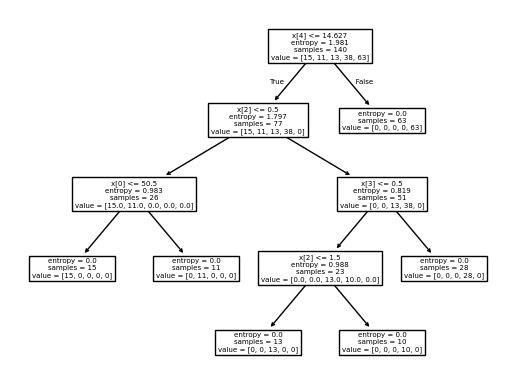

In [17]:
plot_tree(decisionTree1)
plt.show()

Based on the observation above, predictions accuracy increase when the decision tree has max_depth=4

**Created by:  Potjamarn Arpornratn**